In [1]:
import pandas as pd
import numpy as np

In [2]:
df_csv = pd.read_csv("CSV File.csv")

# Handling Rows

In [3]:
df_csv.head()

,Name,Sales,Age,Region
0,LA,93114,89,North
1,FN,73736,36,North
2,GG,64065,70,West
3,LQ,71329,20,West
4,PM,59247,45,North


In [4]:
df_csv.drop(index = [0,3,5])

,Name,Sales,Age,Region
1,FN,73736,36,North
2,GG,64065,70,West
4,PM,59247,45,North
6,HM,54762,71,South
7,OA,35259,96,North
...,...,...,...,...
5098,DE,30173,36,North
5099,CM,43506,67,South
5100,LI,57981,44,North
5101,QI,53475,44,North


In [5]:
df = df_csv.iloc[:5]
df

,Name,Sales,Age,Region
0,LA,93114,89,North
1,FN,73736,36,North
2,GG,64065,70,West
3,LQ,71329,20,West
4,PM,59247,45,North


In [6]:
df1 = df_csv.iloc[10:15]
df1

,Name,Sales,Age,Region
10,MM,31121,89,North
11,ID,64688,72,North
12,FO,6517,55,South
13,LI,51476,63,North
14,BK,33724,50,North


In [7]:
pd.concat([df, df1])

,Name,Sales,Age,Region
0,LA,93114,89,North
1,FN,73736,36,North
2,GG,64065,70,West
3,LQ,71329,20,West
4,PM,59247,45,North
10,MM,31121,89,North
11,ID,64688,72,North
12,FO,6517,55,South
13,LI,51476,63,North
14,BK,33724,50,North


In [8]:
pd.concat([df, df1]).reset_index(drop = True)

,Name,Sales,Age,Region
0,LA,93114,89,North
1,FN,73736,36,North
2,GG,64065,70,West
3,LQ,71329,20,West
4,PM,59247,45,North
5,MM,31121,89,North
6,ID,64688,72,North
7,FO,6517,55,South
8,LI,51476,63,North
9,BK,33724,50,North


# Handling Duplicates

In [9]:
dups = pd.read_excel("Duplicates.xlsx")
dups

,Name,Age,Sal
0,A,38,33
1,B,60,40
2,B,60,40
3,B,60,40
4,E,28,57
5,F,38,73
6,F,38,73
7,H,44,66
8,I,29,26
9,I,72,15


In [10]:
# Checking duplicates
dups.duplicated()

0    False
1    False
2     True
3     True
4    False
5    False
6     True
7    False
8    False
9    False
dtype: bool

In [11]:
# Retrieving the duplicates
dups[dups.duplicated()]

,Name,Age,Sal
2,B,60,40
3,B,60,40
6,F,38,73


In [12]:
# Removing duplicates
dups.drop_duplicates()

,Name,Age,Sal
0,A,38,33
1,B,60,40
4,E,28,57
5,F,38,73
7,H,44,66
8,I,29,26
9,I,72,15


In [13]:
dups

,Name,Age,Sal
0,A,38,33
1,B,60,40
2,B,60,40
3,B,60,40
4,E,28,57
5,F,38,73
6,F,38,73
7,H,44,66
8,I,29,26
9,I,72,15


In [14]:
# Check duplicates at column level
dups.drop_duplicates(subset = "Name")

,Name,Age,Sal
0,A,38,33
1,B,60,40
4,E,28,57
5,F,38,73
7,H,44,66
8,I,29,26


In [15]:
dups.iloc[:100].drop_duplicates(subset = ["Name", "Age"])

,Name,Age,Sal
0,A,38,33
1,B,60,40
4,E,28,57
5,F,38,73
7,H,44,66
8,I,29,26
9,I,72,15


# Handling Missing Values

In [16]:
nulls = pd.read_excel("Duplicates.xlsx", sheet_name = "Sheet2")
nulls

,Name,Age,Temp,Sal
0,A,38.0,NaN,33.0
1,B,60.0,NaN,40.0
2,B,60.0,NaN,40.0
3,B,60.0,NaN,NaN
4,E,28.0,NaN,57.0
5,F,38.0,NaN,73.0
6,NaN,NaN,NaN,NaN
7,H,44.0,NaN,66.0
8,NaN,29.0,NaN,26.0
9,I,72.0,NaN,15.0


In [17]:
# nan, NaN, NaT, None

In [18]:
nulls.isnull().sum()

Name     2
Age      1
Temp    10
Sal      2
dtype: int64

# Eliminting Nulls

In [19]:
nulls.dropna() # axis = 0 (row nulls) and how = "any"

,Name,Age,Temp,Sal


In [20]:
nulls.dropna(axis = 0, how = "any")

,Name,Age,Temp,Sal


In [21]:
nulls.dropna(axis = 0, how = "all") #only if all the values in the row are null

,Name,Age,Temp,Sal
0,A,38.0,NaN,33.0
1,B,60.0,NaN,40.0
2,B,60.0,NaN,40.0
3,B,60.0,NaN,NaN
4,E,28.0,NaN,57.0
5,F,38.0,NaN,73.0
7,H,44.0,NaN,66.0
8,NaN,29.0,NaN,26.0
9,I,72.0,NaN,15.0


In [22]:
nulls.dropna(axis = 1) # column level

""
0
1
2
3
4
5
6
7
8
9


In [23]:
nulls.dropna(axis = 1, how = "all") # column level

,Name,Age,Sal
0,A,38.0,33.0
1,B,60.0,40.0
2,B,60.0,40.0
3,B,60.0,NaN
4,E,28.0,57.0
5,F,38.0,73.0
6,NaN,NaN,NaN
7,H,44.0,66.0
8,NaN,29.0,26.0
9,I,72.0,15.0


# Replace Nulls

In [24]:
nulls

,Name,Age,Temp,Sal
0,A,38.0,NaN,33.0
1,B,60.0,NaN,40.0
2,B,60.0,NaN,40.0
3,B,60.0,NaN,NaN
4,E,28.0,NaN,57.0
5,F,38.0,NaN,73.0
6,NaN,NaN,NaN,NaN
7,H,44.0,NaN,66.0
8,NaN,29.0,NaN,26.0
9,I,72.0,NaN,15.0


In [25]:
nulls.fillna("Mumbai University")

,Name,Age,Temp,Sal
0,A,38.0,Mumbai University,33.0
1,B,60.0,Mumbai University,40.0
2,B,60.0,Mumbai University,40.0
3,B,60.0,Mumbai University,Mumbai University
4,E,28.0,Mumbai University,57.0
5,F,38.0,Mumbai University,73.0
6,Mumbai University,Mumbai University,Mumbai University,Mumbai University
7,H,44.0,Mumbai University,66.0
8,Mumbai University,29.0,Mumbai University,26.0
9,I,72.0,Mumbai University,15.0


In [26]:
nulls['Age'].mean()

47.666666666666664

In [27]:
nulls['Age'] = nulls['Age'].fillna(nulls['Age'].mean())
nulls

,Name,Age,Temp,Sal
0,A,38.000000,NaN,33.0
1,B,60.000000,NaN,40.0
2,B,60.000000,NaN,40.0
3,B,60.000000,NaN,NaN
4,E,28.000000,NaN,57.0
5,F,38.000000,NaN,73.0
6,NaN,47.666667,NaN,NaN
7,H,44.000000,NaN,66.0
8,NaN,29.000000,NaN,26.0
9,I,72.000000,NaN,15.0


# Group by & Pivot table

In [28]:
df_csv

,Name,Sales,Age,Region
0,LA,93114,89,North
1,FN,73736,36,North
2,GG,64065,70,West
3,LQ,71329,20,West
4,PM,59247,45,North
...,...,...,...,...
5098,DE,30173,36,North
5099,CM,43506,67,South
5100,LI,57981,44,North
5101,QI,53475,44,North


In [29]:
df_csv['Region'].unique()

array(['North', 'West', 'South'], dtype=object)

In [30]:
df_csv.groupby('Region')['Sales'].sum()/1000000

Region
North    84.551332
South    85.404474
West     84.597678
Name: Sales, dtype: float64

In [31]:
sales = pd.read_excel("Dmart.xlsx")
sales.shape

(6428, 18)

In [32]:
sales.columns

Index(['Order Date', 'Order Priority', 'Ship Type', 'City', 'State', 'Country',
       'Region', 'Segment', 'Super Category', 'Category', 'Price',
       'Operational/ Production Cost', 'Selling Price', 'Discount',
       'Shipping Cost', 'Sales (shipping price included)', 'Profit',
       'Quantity'],
      dtype='object')

In [33]:
df = sales.rename(columns = {'Sales (shipping price included)' : "Sales"})

In [34]:
salesbypriority = df.groupby("Order Priority")['Sales'].mean()
salesbypriority

Order Priority
Extreme     916.212866
High        870.855561
Low         887.065387
Moderate    779.774703
Name: Sales, dtype: float64

In [35]:
df.groupby(["Order Priority", 'Region'])['Sales'].sum()/10000

Order Priority  Region        
Extreme         Central Asia        9.499916
                North Asia         14.158799
                Southeast Asia      1.079033
High            Central Asia       24.053922
                North Asia         62.010489
                Southeast Asia      2.327428
Low             Central Asia      183.287861
                North Asia        148.376310
                Southeast Asia     15.621928
Moderate        Central Asia       46.420413
                North Asia         45.276815
                Southeast Asia      4.059105
Name: Sales, dtype: float64

In [36]:
df.groupby(["Order Priority", 'Region'], as_index = False)['Sales'].sum()

,Order Priority,Region,Sales
0,Extreme,Central Asia,9.499916e+04
1,Extreme,North Asia,1.415880e+05
2,Extreme,Southeast Asia,1.079033e+04
3,High,Central Asia,2.405392e+05
4,High,North Asia,6.201049e+05
5,High,Southeast Asia,2.327428e+04
6,Low,Central Asia,1.832879e+06
7,Low,North Asia,1.483763e+06
8,Low,Southeast Asia,1.562193e+05
9,Moderate,Central Asia,4.642041e+05


# Pivot_table

In [37]:
df.columns

Index(['Order Date', 'Order Priority', 'Ship Type', 'City', 'State', 'Country',
       'Region', 'Segment', 'Super Category', 'Category', 'Price',
       'Operational/ Production Cost', 'Selling Price', 'Discount',
       'Shipping Cost', 'Sales', 'Profit', 'Quantity'],
      dtype='object')

In [38]:
df.pivot_table(columns = 'Region', index = 'Order Priority', values = 'Profit', aggfunc = "sum")

Region,Central Asia,North Asia,Southeast Asia
Order Priority,,,
Extreme,7129.16375,27925.90230,2007.890578
High,34419.47391,113378.57696,-471.216047
Low,291900.02927,253136.42914,8583.405308
Moderate,64748.17063,74723.91011,3894.091134


In [39]:
df.pivot_table(columns = 'Region', index = 'Order Priority', values = 'Profit', aggfunc = "sum", margins = True)

Region,Central Asia,North Asia,Southeast Asia,All
Order Priority,,,,
Extreme,7129.16375,27925.90230,2007.890578,37062.956628
High,34419.47391,113378.57696,-471.216047,147326.834823
Low,291900.02927,253136.42914,8583.405308,553619.863718
Moderate,64748.17063,74723.91011,3894.091134,143366.171874
All,398196.83756,469164.81851,14014.170973,881375.827043


# Merge & Joins
1. Merge - Traditional SQL join - Joins two tables based on the common columns
1. Join - Joins two tables based on the common Indexes

In [40]:
ords = pd.read_excel("PropertyOrderProduct.xlsx", sheet_name = "OrderDetails")
# props = pd.read_excel("PropertyOrderProduct.xlsx", sheet_name = "PropertyInfo")
prods = pd.read_excel("PropertyOrderProduct.xlsx", sheet_name = "Products")

In [41]:
ords.head(2)

,OrderID,OrderDate,PropertyID,ProductID,Quantity
0,1,2015-01-01,17,41,1
1,2,2015-01-01,15,54,2


In [42]:
prods.head(2)

,ProductID,ProductName,ProductCategory,Price
0,1,Large Towel,Housekeeping,9
1,2,Hand Towel,Housekeeping,5


In [43]:
ords.merge(prods, on = "ProductID", how = "inner") #left, right, outer

,OrderID,OrderDate,PropertyID,ProductID,Quantity,ProductName,ProductCategory,Price
0,1,2015-01-01,17,41,1,Office Chair,Furnishings,85
1,57,2015-01-10,19,41,2,Office Chair,Furnishings,85
2,128,2015-01-21,11,41,2,Office Chair,Furnishings,85
3,163,2015-01-25,17,41,2,Office Chair,Furnishings,85
4,378,2015-02-27,5,41,3,Office Chair,Furnishings,85
...,...,...,...,...,...,...,...,...
4995,4872,2016-12-08,8,32,3,Note Pads,Office Supplies,14
4996,4876,2016-12-08,4,32,3,Note Pads,Office Supplies,14
4997,4892,2016-12-12,18,32,2,Note Pads,Office Supplies,14
4998,4897,2016-12-13,1,32,1,Note Pads,Office Supplies,14


In [44]:
ords.merge(prods, on = "ProductID", how = "left")

,OrderID,OrderDate,PropertyID,ProductID,Quantity,ProductName,ProductCategory,Price
0,1,2015-01-01,17,41,1,Office Chair,Furnishings,85
1,2,2015-01-01,15,54,2,Chest of Drawers,Furnishings,150
2,3,2015-01-01,5,71,2,Hammer,Maintenance,17
3,4,2015-01-01,19,3,2,Washcloth,Housekeeping,3
4,5,2015-01-01,12,45,3,Computer Desk,Furnishings,102
...,...,...,...,...,...,...,...,...
4995,4996,2016-12-31,3,47,2,Swivel Chair,Furnishings,75
4996,4997,2016-12-31,12,57,1,Wireless Router,Furnishings,70
4997,4998,2016-12-31,7,77,1,Large Area Rug,Public Areas,40
4998,4999,2016-12-31,17,57,1,Wireless Router,Furnishings,70


In [45]:
ords.merge(prods, on = "ProductID", how = "right")

,OrderID,OrderDate,PropertyID,ProductID,Quantity,ProductName,ProductCategory,Price
0,176,2015-01-27,6,1,1,Large Towel,Housekeeping,9
1,488,2015-03-15,8,1,1,Large Towel,Housekeeping,9
2,492,2015-03-15,13,1,1,Large Towel,Housekeeping,9
3,633,2015-04-06,8,1,3,Large Towel,Housekeeping,9
4,708,2015-04-17,7,1,3,Large Towel,Housekeeping,9
...,...,...,...,...,...,...,...,...
4995,4654,2016-11-04,9,94,3,Monitor,Public Areas,70
4996,4702,2016-11-11,10,94,2,Monitor,Public Areas,70
4997,4703,2016-11-12,5,94,2,Monitor,Public Areas,70
4998,4755,2016-11-19,3,94,3,Monitor,Public Areas,70


In [46]:
ords.merge(prods, on = "ProductID", how = "outer")

,OrderID,OrderDate,PropertyID,ProductID,Quantity,ProductName,ProductCategory,Price
0,1,2015-01-01,17,41,1,Office Chair,Furnishings,85
1,57,2015-01-10,19,41,2,Office Chair,Furnishings,85
2,128,2015-01-21,11,41,2,Office Chair,Furnishings,85
3,163,2015-01-25,17,41,2,Office Chair,Furnishings,85
4,378,2015-02-27,5,41,3,Office Chair,Furnishings,85
...,...,...,...,...,...,...,...,...
4995,4872,2016-12-08,8,32,3,Note Pads,Office Supplies,14
4996,4876,2016-12-08,4,32,3,Note Pads,Office Supplies,14
4997,4892,2016-12-12,18,32,2,Note Pads,Office Supplies,14
4998,4897,2016-12-13,1,32,1,Note Pads,Office Supplies,14


In [47]:
df1

,Name,Sales,Age,Region
10,MM,31121,89,North
11,ID,64688,72,North
12,FO,6517,55,South
13,LI,51476,63,North
14,BK,33724,50,North


In [48]:
df2 = df.iloc[13:20, :5]
df2

,Order Date,Order Priority,Ship Type,City,State
13,2015-01-02,Moderate,Named Day,Dhaka,Dhaka
14,2015-01-02,Moderate,Named Day,Dhaka,Dhaka
15,2015-01-02,Moderate,Named Day,Dhaka,Dhaka
16,2015-01-02,Moderate,Named Day,Dhaka,Dhaka
17,2015-01-02,Moderate,Named Day,Dhaka,Dhaka
18,2015-01-02,Moderate,Named Day,Dhaka,Dhaka
19,2015-01-02,Moderate,Named Day,Chongqing,Chongqing


In [49]:
df1.join(df2, how = "inner")

,Name,Sales,Age,Region,Order Date,Order Priority,Ship Type,City,State
13,LI,51476,63,North,2015-01-02,Moderate,Named Day,Dhaka,Dhaka
14,BK,33724,50,North,2015-01-02,Moderate,Named Day,Dhaka,Dhaka


In [50]:
df1.join(df2, how = "left")

,Name,Sales,Age,Region,Order Date,Order Priority,Ship Type,City,State
10,MM,31121,89,North,NaT,NaN,NaN,NaN,NaN
11,ID,64688,72,North,NaT,NaN,NaN,NaN,NaN
12,FO,6517,55,South,NaT,NaN,NaN,NaN,NaN
13,LI,51476,63,North,2015-01-02,Moderate,Named Day,Dhaka,Dhaka
14,BK,33724,50,North,2015-01-02,Moderate,Named Day,Dhaka,Dhaka


In [51]:
df1.join(df2, how = "right")

,Name,Sales,Age,Region,Order Date,Order Priority,Ship Type,City,State
13,LI,51476.0,63.0,North,2015-01-02,Moderate,Named Day,Dhaka,Dhaka
14,BK,33724.0,50.0,North,2015-01-02,Moderate,Named Day,Dhaka,Dhaka
15,NaN,NaN,NaN,NaN,2015-01-02,Moderate,Named Day,Dhaka,Dhaka
16,NaN,NaN,NaN,NaN,2015-01-02,Moderate,Named Day,Dhaka,Dhaka
17,NaN,NaN,NaN,NaN,2015-01-02,Moderate,Named Day,Dhaka,Dhaka
18,NaN,NaN,NaN,NaN,2015-01-02,Moderate,Named Day,Dhaka,Dhaka
19,NaN,NaN,NaN,NaN,2015-01-02,Moderate,Named Day,Chongqing,Chongqing


In [52]:
df1.join(df2, how = "outer")

,Name,Sales,Age,Region,Order Date,Order Priority,Ship Type,City,State
10,MM,31121.0,89.0,North,NaT,NaN,NaN,NaN,NaN
11,ID,64688.0,72.0,North,NaT,NaN,NaN,NaN,NaN
12,FO,6517.0,55.0,South,NaT,NaN,NaN,NaN,NaN
13,LI,51476.0,63.0,North,2015-01-02,Moderate,Named Day,Dhaka,Dhaka
14,BK,33724.0,50.0,North,2015-01-02,Moderate,Named Day,Dhaka,Dhaka
15,NaN,NaN,NaN,NaN,2015-01-02,Moderate,Named Day,Dhaka,Dhaka
16,NaN,NaN,NaN,NaN,2015-01-02,Moderate,Named Day,Dhaka,Dhaka
17,NaN,NaN,NaN,NaN,2015-01-02,Moderate,Named Day,Dhaka,Dhaka
18,NaN,NaN,NaN,NaN,2015-01-02,Moderate,Named Day,Dhaka,Dhaka
19,NaN,NaN,NaN,NaN,2015-01-02,Moderate,Named Day,Chongqing,Chongqing


In [53]:
df1

,Name,Sales,Age,Region
10,MM,31121,89,North
11,ID,64688,72,North
12,FO,6517,55,South
13,LI,51476,63,North
14,BK,33724,50,North


In [54]:
df1.melt(id_vars = ['Name', "Region"], value_vars = ['Sales', 'Age']) # Elongating a widened table

,Name,Region,variable,value
0,MM,North,Sales,31121
1,ID,North,Sales,64688
2,FO,South,Sales,6517
3,LI,North,Sales,51476
4,BK,North,Sales,33724
5,MM,North,Age,89
6,ID,North,Age,72
7,FO,South,Age,55
8,LI,North,Age,63
9,BK,North,Age,50


# Matplotlib

In [58]:
import matplotlib.pyplot as plt

In [59]:
salesbypriority

Order Priority
Extreme     916.212866
High        870.855561
Low         887.065387
Moderate    779.774703
Name: Sales, dtype: float64

In [60]:
x = salesbypriority.index
x

Index(['Extreme', 'High', 'Low', 'Moderate'], dtype='object', name='Order Priority')

In [61]:
y = salesbypriority.values
y

array([916.2128661 , 870.85556096, 887.06538694, 779.77470317])

# Line Chart

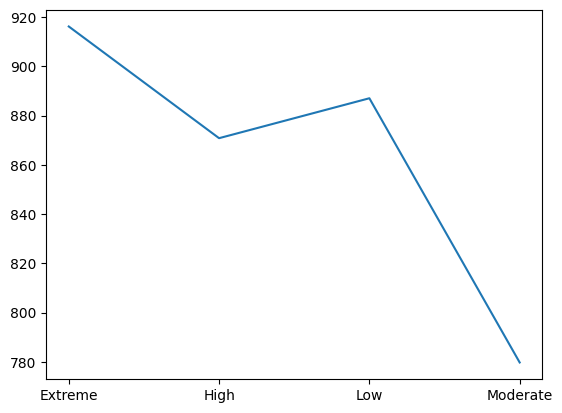

In [62]:
plt.plot(x, y) #x-axis, y-axis

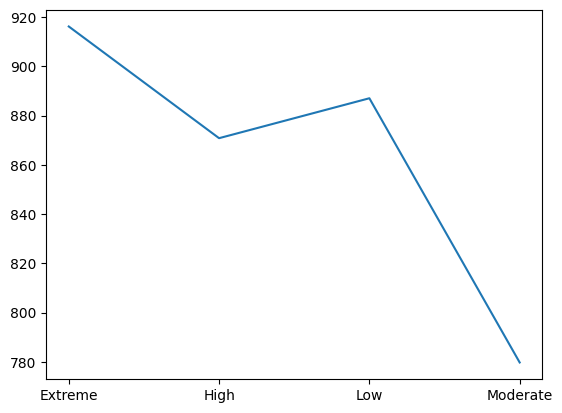

In [63]:
plt.plot(x, y);

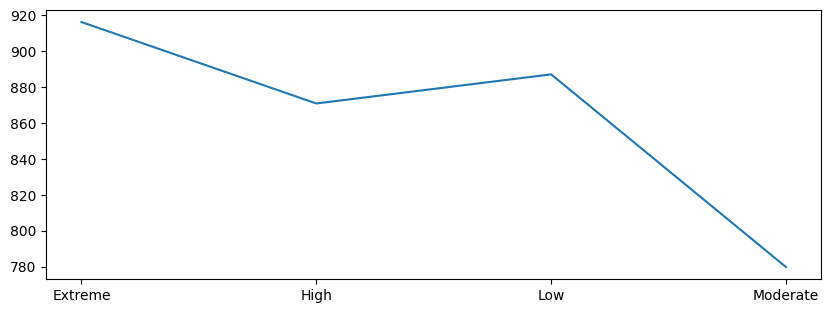

In [64]:
plt.figure(figsize = (10, 3.5)) #width, height in inches
plt.plot(x, y);

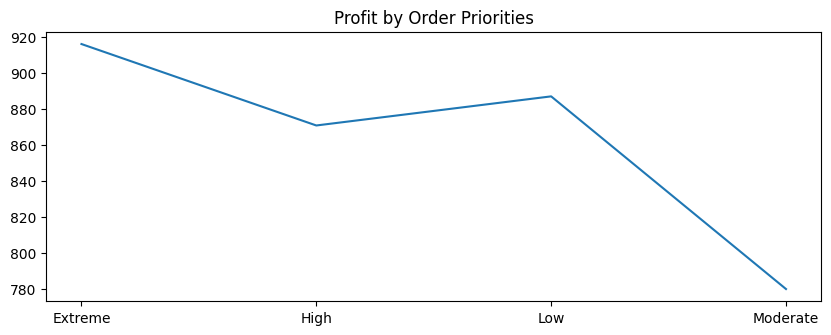

In [65]:
plt.figure(figsize = (10, 3.5)) 
plt.title("Profit by Order Priorities")
plt.plot(x, y);

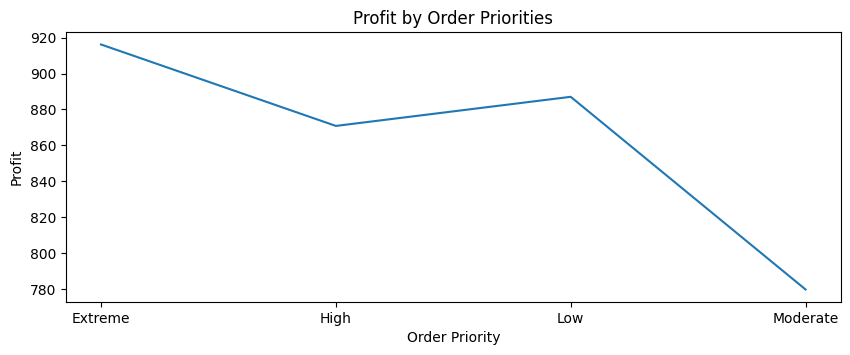

In [66]:
plt.figure(figsize = (10, 3.5)) 
plt.title("Profit by Order Priorities")
plt.plot(x, y)
plt.xlabel("Order Priority")
plt.ylabel("Profit");

In [67]:
# k - black
# w - white
# y - yellow
# c - cyan
# m - magenta
# g - green
# b - blue
# r - red
# orange - orange

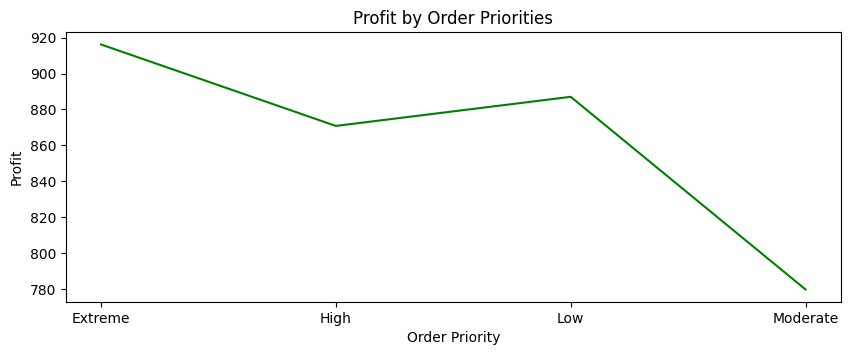

In [68]:
plt.figure(figsize = (10, 3.5)) 
plt.title("Profit by Order Priorities")
plt.plot(x, y, "g") #x, y, color
plt.xlabel("Order Priority")
plt.ylabel("Profit");

In [69]:
# markers - diff shape of lines
# --, --o, o, *, D - diamond, s - square, ^, >, <, v, +, 

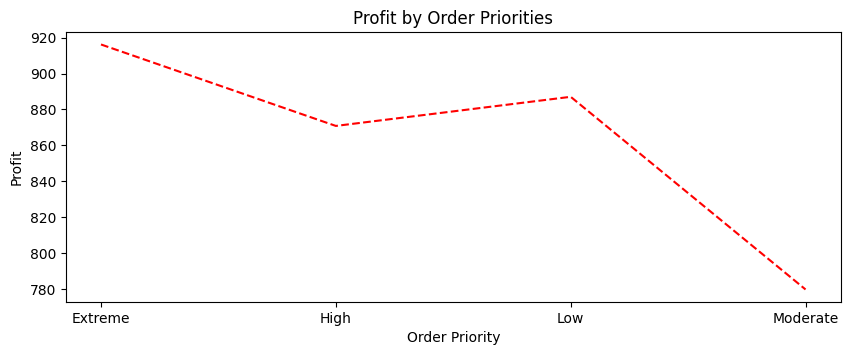

In [70]:
plt.figure(figsize = (10, 3.5)) 
plt.title("Profit by Order Priorities")
plt.plot(x, y, "r--") #x, y, color--line format
plt.xlabel("Order Priority")
plt.ylabel("Profit");

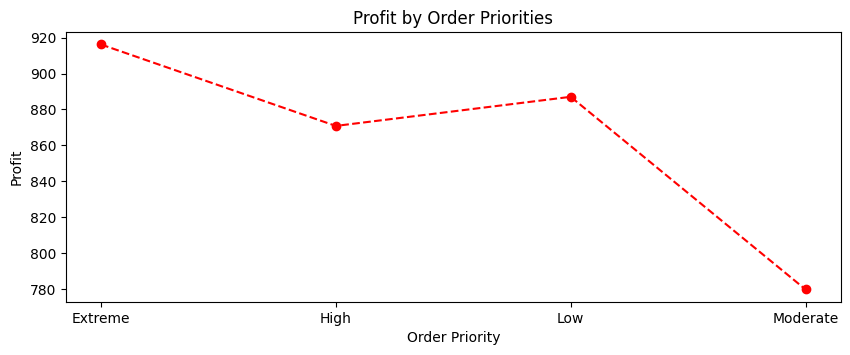

In [71]:
plt.figure(figsize = (10, 3.5)) 
plt.title("Profit by Order Priorities")
plt.plot(x, y, "r--o") #x, y, color--line format
plt.xlabel("Order Priority")
plt.ylabel("Profit");

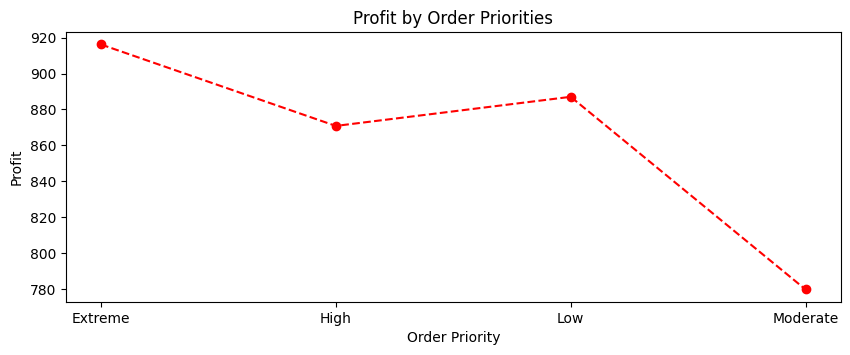

In [72]:
plt.figure(figsize = (10, 3.5)) 
plt.title("Profit by Order Priorities")
plt.plot(x, y, "r--o") #x, y, color--line format
plt.xlabel("Order Priority")
plt.ylabel("Profit")
plt.savefig("Profit by Order priority.jpeg") #.png, .jpg, .tiff

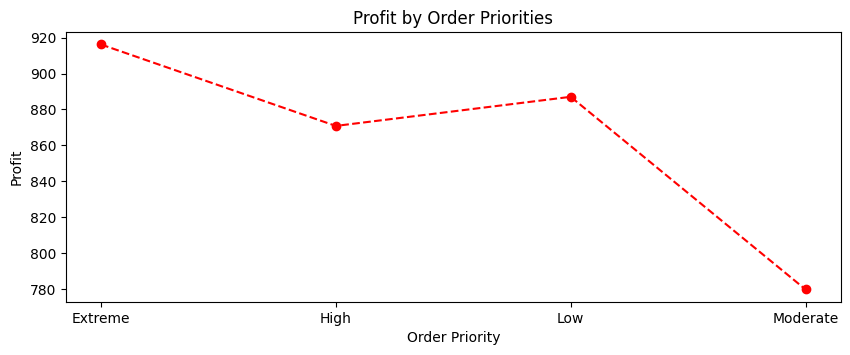

In [73]:
# Increasing the resolution of the image saved
plt.figure(figsize = (10, 3.5)) 
plt.title("Profit by Order Priorities")
plt.plot(x, y, "r--o") #x, y, color--line format
plt.xlabel("Order Priority")
plt.ylabel("Profit")
plt.savefig("Profit by Order priority.jpeg", dpi = 300) 

In [74]:
y

array([916.2128661 , 870.85556096, 887.06538694, 779.77470317])

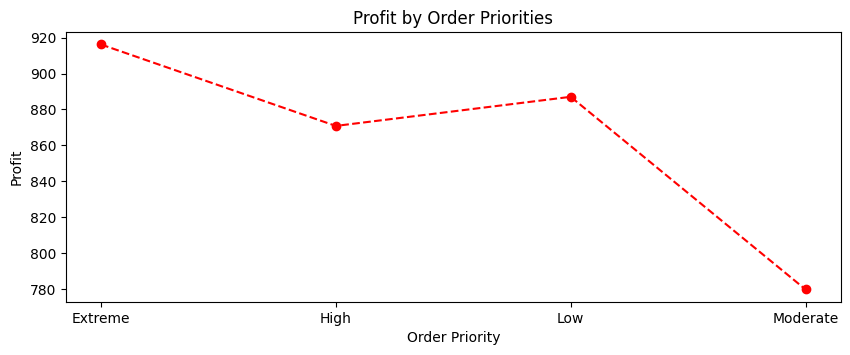

In [75]:
# Increasing the resolution of the image saved
plt.figure(figsize = (10, 3.5)) 
plt.title("Profit by Order Priorities")
plt.plot(x, y, "r--o") #x, y, color--line format
plt.xlabel("Order Priority")
plt.ylabel("Profit");

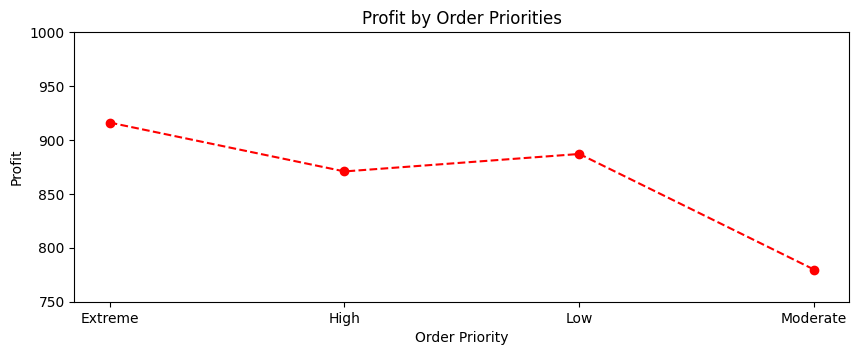

In [76]:
# Increasing the resolution of the image saved
plt.figure(figsize = (10, 3.5)) 
plt.title("Profit by Order Priorities")
plt.plot(x, y, "r--o") #x, y, color--line format
plt.ylim([750, 1000])
plt.xlabel("Order Priority")
plt.ylabel("Profit");

In [77]:
np.arange(750,1000,75)

array([750, 825, 900, 975])

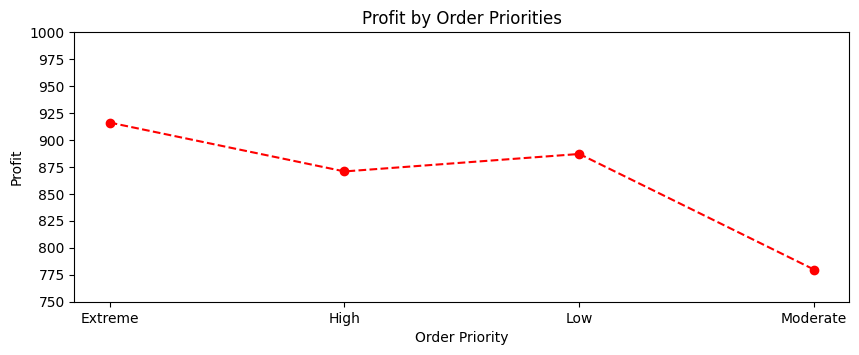

In [78]:
# Increasing the resolution of the image saved
plt.figure(figsize = (10, 3.5)) 
plt.title("Profit by Order Priorities")
plt.plot(x, y, "r--o") #x, y, color--line format
plt.ylim([750, 1000])
plt.yticks(np.arange(750,1001,25))
plt.xlabel("Order Priority")
plt.ylabel("Profit");

# Bar Chart

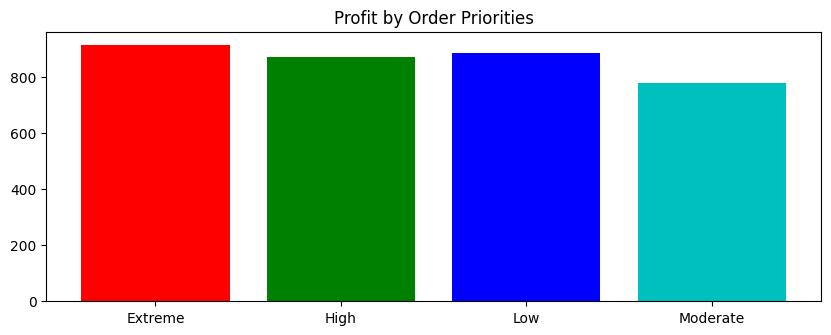

In [79]:
plt.figure(figsize = (10, 3.5)) 
plt.title("Profit by Order Priorities")
plt.bar(x, y, color = ['r', 'g', 'b', 'c']);

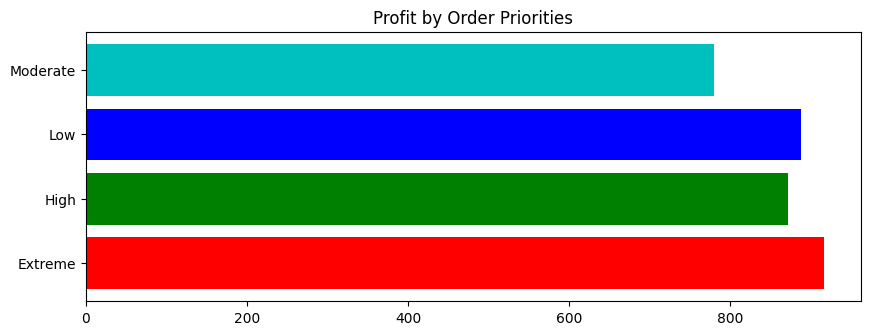

In [80]:
plt.figure(figsize = (10, 3.5)) 
plt.title("Profit by Order Priorities")
plt.barh(x, y, color = ['r', 'g', 'b', 'c']);

# Scatter Plot

In [81]:
df.columns

Index(['Order Date', 'Order Priority', 'Ship Type', 'City', 'State', 'Country',
       'Region', 'Segment', 'Super Category', 'Category', 'Price',
       'Operational/ Production Cost', 'Selling Price', 'Discount',
       'Shipping Cost', 'Sales', 'Profit', 'Quantity'],
      dtype='object')

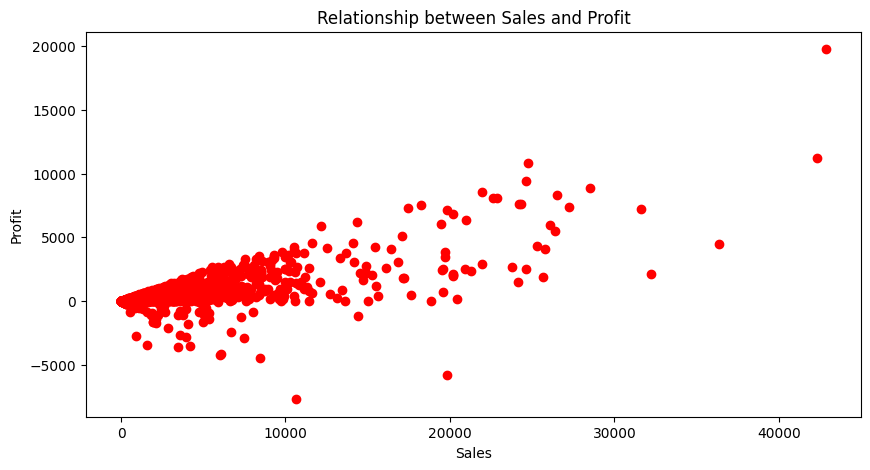

In [82]:
plt.figure(figsize = (10, 5)) 
plt.title("Relationship between Sales and Profit")
plt.scatter(df['Sales'], df['Profit'], color = 'r')
plt.xlabel("Sales")
plt.ylabel("Profit");

# Boxplot

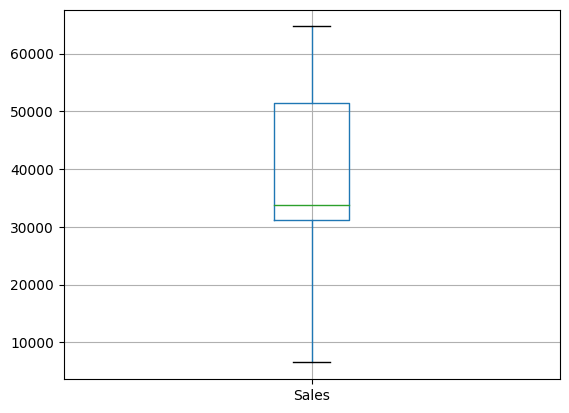

In [83]:
df1.boxplot('Sales');

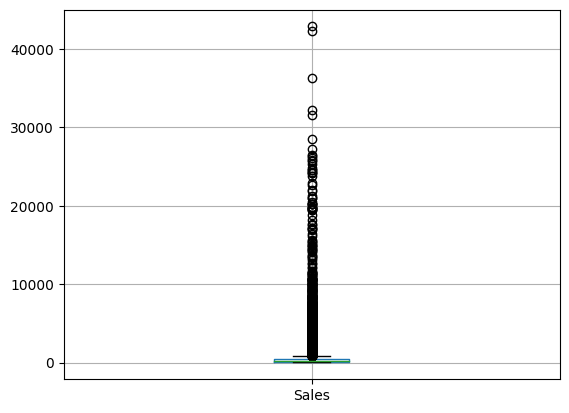

In [84]:
df.boxplot('Sales');

# Histogram

In [85]:
df['Sales'].describe()

count     6428.000000
mean       865.233384
std       2639.154865
min          4.529412
25%         80.333333
50%        140.441176
75%        391.028056
max      42854.863900
Name: Sales, dtype: float64

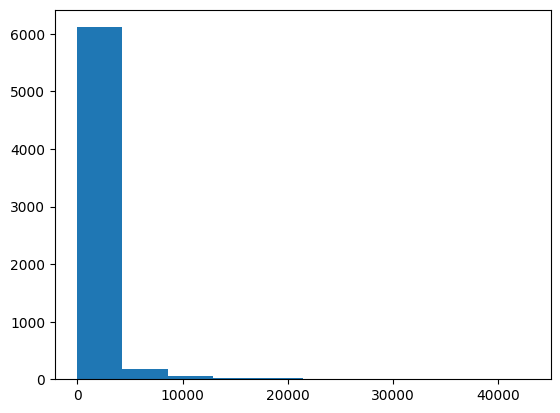

In [86]:
plt.hist(df['Sales'].values);

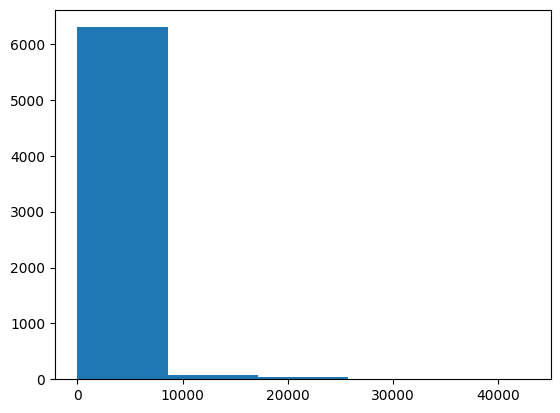

In [87]:
plt.hist(df['Sales'].values, bins = 5);

In [88]:
x

Index(['Extreme', 'High', 'Low', 'Moderate'], dtype='object', name='Order Priority')

In [89]:
y

array([916.2128661 , 870.85556096, 887.06538694, 779.77470317])

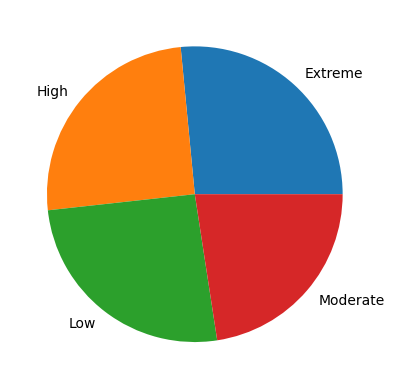

In [90]:
plt.pie(y, labels = x);

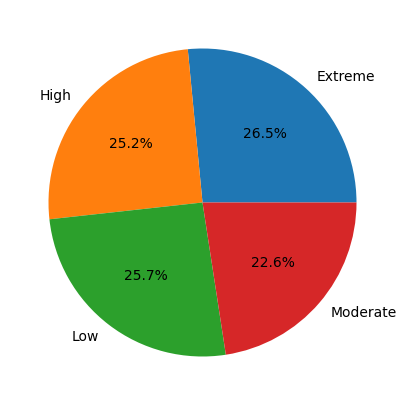

In [91]:
plt.figure(figsize = (10, 5))
plt.pie(y, labels = x, autopct = "%1.1f%%");